# Лабораторная работа №2 
## Генерация графиков функций

**Номер варианта - 24  
Задание:**   
* Эллипс и половина эллипса.  Варьируются длины осей эллипса и угол поворота большой оси эллипса относительно оси x.
* Конхоида Никомеда x = a + bcost; y = atgt + bsint (-π / 2 < t < π / 2) и половина конхоиды. Варьируются a и b.
* Правильный шестиугольник и правильный шестиугольник без одной стороны. Варьируются радиус окружности, в которую вписан шестиугольник, и угол поворота шестиугольника относительно своего центра.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import cv2
size = 64

In [24]:
(h, w) = (size, size)
center = (size/2, size/2)

In [25]:
def func1(x):
    return 0.7* np.sqrt(120 - (x - size/2)**2 / 2) + size/2
def func2(x):
    return -0.7*np.sqrt(120 - (x - size/2)**2 / 2) + size/2

In [26]:
def ellipse():
    image = np.zeros((h, w))
    x = np.linspace(0,size,size + 1)
    
    j = 0
    last = 0
    
    #основной силуэт
    for i in range(image.shape[0]):
        clr_mim, clr_max = 30, 70
        
        if (abs(func1(i)) < size - 1) & (abs(func2(i)) < size - 1):
            image[size - round(func1(i))][i] = np.random.randint(low=clr_mim, high=clr_max)
            image[size - round(func2(i))][i] = np.random.randint(low=clr_mim, high=clr_max)
            
            #Заполнения пропусков между половинами
            if j == 0:
                j = 1
                while (image[size - round(func1(i)) + j][i] == 0):
                    image[size - round(func1(i)) + j][i] = np.random.randint(low=clr_mim, high=clr_max)
                    j += 1
            last = 2
            
        elif last == 2:
            last = 1
            while (image[size - round(func1(i - 1)) + last][i - 1] == 0):
                image[size - round(func1(i - 1)) + last][i - 1] = np.random.randint(low=clr_mim, high=clr_max)
                last += 1
            last = -1

                
    return image

In [27]:
def konhueta(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    #объявления
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(-np.pi, np.pi, 200) 
    else:
        t = np.linspace(-np.pi/2, np.pi/2, 200) 
    x = wight + hight*np.cos(t);
    y = wight*np.tan(t) + hight*np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [28]:
def ellipse(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    #объявления
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200)
    else:
        t = np.linspace(np.pi, 2*np.pi, 200)
    x = wight * np.cos(t)
    y = hight * np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        clr = np.random.randint(clr_mim, clr_max)
        image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [ ]:
def paskal_snail(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    #объявления
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200) 
    else:
        t = np.linspace(0, np.pi, 200) 
    x = 2*wight*np.cos(t) - hight*np.cos(2*t)
    y = 2*wight*np.sin(t) - hight* np.sin(2*t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

In [117]:
def create_figure(figure, noise_level=1, half=False):
    weight, height = np.random.uniform(size_min, size_max), np.random.uniform(size_min, size_max)
    angle = np.random.uniform(angle_min, angle_max)
    image = figure(weight, height, angle, noise_level, half)
    return image

In [184]:
file_name_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file_train = open(file_name_train, 'wb')
file_lable_train = open(file_lable_train, 'wb')
train_matrices = []
train_labels = []
for i in range(600):
    size_min, size_max = 10, 30
    angle_min, angle_max = 0, 90
    label = 0 # ellipse
    image = create_figure(ellipse, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 1 # half-ellipse
    image = create_figure(ellipse, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)
       
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 180
    label = 2 # konhoida
    image = create_figure(konhueta, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 3 # half-konhoida
    image = create_figure(konhueta, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)
    
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 90
    label = 4 # snail
    image = create_figure(paskal_snail, noise_level=2)
    train_matrices.append(image)
    train_labels.append(label)
    
    label = 5 # half-snail
    image = create_figure(paskal_snail, noise_level=2, half=True)
    train_matrices.append(image)
    train_labels.append(label)

train_matrices = np.array(train_matrices)
train_labels = np.array(train_labels)
train_matrices.tofile(file_train)
train_labels.tofile(file_lable_train)
file_train.close();
file_lable_train.close();

#Test
file_name_test = 'data_test.bin'
file_lable_test = 'label_test.bin'
file_test = open(file_name_test, 'wb')
file_lable_test = open(file_lable_test, 'wb')
test_matrices = []
test_labels = []
for i in range(100):
    size_min, size_max = 10, 30
    angle_min, angle_max = 0, 90
    label = 0 # ellipse
    image = create_figure(ellipse, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 1 # half-ellipse
    image = create_figure(ellipse, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
       
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 180
    label = 2 # konhoida
    image = create_figure(konhueta, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 3 # half-konhoida
    image = create_figure(konhueta, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
    
    size_min, size_max = 5, 10
    angle_min, angle_max = 0, 90
    label = 4 # snail
    image = create_figure(paskal_snail, noise_level=2)
    test_matrices.append(image)
    test_labels.append(label)
    
    label = 5 # half-snail
    image = create_figure(paskal_snail, noise_level=2, half=True)
    test_matrices.append(image)
    test_labels.append(label)
    
test_matrices = np.array(test_matrices)
test_labels = np.array(test_labels)
test_matrices.tofile(file_test)
test_labels.tofile(file_lable_test)    
file_test.close()
file_lable_test.close()

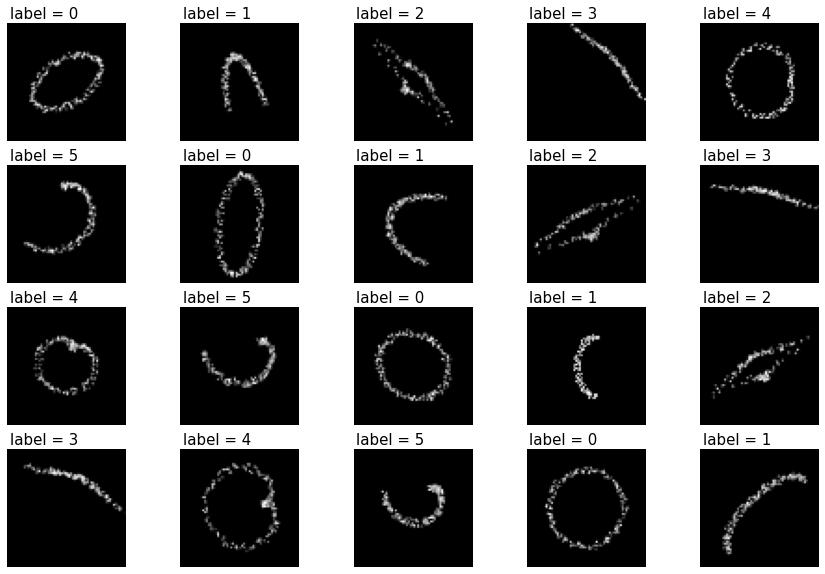

In [185]:
file_name_train = 'data_train.bin'
file_lable_train = 'label_train.bin'
file = open(file_name_train, 'rb')
file2 = open(file_lable_train, 'rb')
fig, ax = plt.subplots(4,5, figsize=(15,10))
mas_from_file = np.fromfile(file)
matrices = []
for i in range(600 * 6):
    matrices.append(mas_from_file[64*64*(i):64*64*(i+1)].reshape((64,64)))

labels = np.fromfile(file=file2, dtype=np.int_)
matrices = np.array(matrices)
labels = np.array(labels)
for i in range(4):
    for j in range(5):
        ax[i][j].imshow(matrices[i*5+j], cmap = 'gray')
        ax[i][j].axis('off')
        ax[i][j].text(1, -3, f'label = {labels[i*5+j]}', size=15)

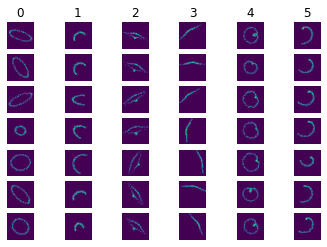

In [181]:
classes = list(np.arange(6))
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(matrices[idx].reshape((64, 64)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [26]:
def konhueta(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    #объявления
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(-np.pi, np.pi, 200) 
    else:
        t = np.linspace(-np.pi/2, np.pi/2, 200) 
    x = wight + hight*np.cos(t);
    y = wight*np.tan(t) + hight*np.sin(t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

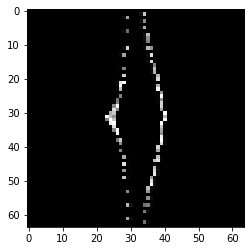

In [51]:
size_min, size_max = 5, 10
angle_min, angle_max = 0, 180
weight, height = np.random.uniform(size_min, size_max), np.random.uniform(size_min, size_max)
angle = np.random.randint(angle_min, angle_max)
image = konhueta(weight, height, 0.2, noise_level=1, half=False)
plt.imshow(image, cmap = 'gray',vmin=0,vmax=64)

In [91]:
def paskal_snail(wight, hight, alpha=0, noise_level=1, half=False, imsize=64):
    #объявления
    h = w = size
    image = np.zeros((h, w))
    if half == False:
        t = np.linspace(0, 2*np.pi, 200) 
    else:
        t = np.linspace(0, np.pi, 200) 
    x = 2*wight*np.cos(t) - hight*np.cos(2*t)
    y = 2*wight*np.sin(t) - hight* np.sin(2*t)
    x_min = int(x.min())
    x_max = int(x.max())
    y_min = int(y.min())
    y_max = int(y.max())
    dx = int((64 - (x_max - x_min)) / 2) 
    dy = int((64 - (y_max - y_min)) / 2) 
    shift_x = abs(x_min) + dx 
    shift_y = abs(y_min) + dy
    clr_mim, clr_max = 30, 70
    for x, y in zip(x, y):
        y_noise = np.random.randint(-noise_level, noise_level)
        x_noise = int(np.random.uniform(-noise_level, noise_level))
        ix = int(x) + shift_x + x_noise
        iy = int(y) + shift_y + y_noise
        if ix<63 and iy<63 and ix>0 and iy>0:
            clr = np.random.randint(clr_mim, clr_max)
            image[iy, ix] = clr
         
    if (alpha != 0):
        rotation = cv2.getRotationMatrix2D(center, alpha, 1.0)
        image = cv2.warpAffine(image, rotation, (w, h))
    return image

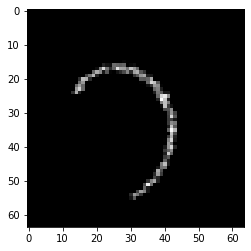

In [178]:
size_min, size_max = 5, 10
angle_min, angle_max = 0, 180
weight, height = np.random.uniform(size_min, size_max), np.random.uniform(size_min, size_max)
angle = np.random.randint(angle_min, angle_max)
image = paskal_snail(weight, height, angle, noise_level=1, half=True)
plt.imshow(image, cmap = 'gray',vmin=0,vmax=64)

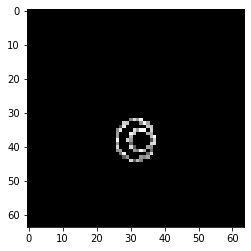

In [90]:
r = 1
h = 5
t = np.linspace(0, 2*np.pi, 200) 
x = 2*r*np.cos(t) - h*np.cos(2*t)
y = 2*r*np.sin(t) - h* np.sin(2*t)
x_min = int(min(x))
x_max = int(max(x))
y_min = int(y.min())
y_max = int(y.min())
# Нужно уместить в 64*64
dx = int((64 - (x_max - x_min)) / 2) # Половина свободного пространства по x
dy = int((64 - (y_max - y_min)) / 2) # Половина свободного пространства по y
shift_x = abs(x_min) + dx # Сдвиг по x
shift_y = abs(y_min) + dy # Сдвиг по y
w = h = 64 # Ширина и высота рисунка
arrPic = np.zeros((w, h), dtype = np.uint8)
clr_mim, clr_max = 75, 255 # Диапазон оттенков серого цвета
for x, y in zip(x, y):
    ix = int(x) + shift_x
    iy = int(y) + shift_y
    if ix<63 and iy<63 and ix>0 and iy>0:
        clr = np.random.randint(clr_mim, clr_max)
        arrPic[iy, ix] = clr
plt.imshow(arrPic, cmap = 'gray')
plt.show()

In [18]:
np.solve(abs(x + 1) - abs(x - 1) + 2*abs(y)/np.sqrt(3))

AttributeError: module 'numpy' has no attribute 'solve'

0 64
0 0
32
s 0 32
0 32
1 33
2 33
3 33
4 33
5 33
6 33
7 33
8 33
9 33
10 33
11 33
12 33
13 33
14 33
15 33
16 33
17 33
18 33
19 33
20 33
21 33
22 33
23 33
24 33
25 33
26 33
27 33
28 33
29 33
30 33
31 33
32 33
33 33
34 33
35 33
36 33
37 33
38 33
39 33
40 33
41 33
42 33
43 33
44 33
45 33
46 33
47 33
48 33
49 33
50 33
51 33
52 33
53 33
54 33
55 33
56 33
57 33
58 33
59 33
60 33
61 33
62 33
63 33
64 33


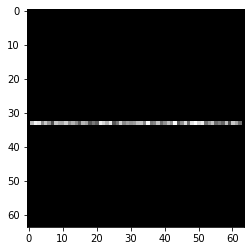

In [31]:
nm = 'Строфоида'
a = 5
b = 15
x = np.linspace(0, 64, 65) 

y = (abs(x + 1) - abs(x - 1))*np.sqrt(3)/2
x_min = int(min(x))
x_max = int(max(x))
y_min = int(y.min())
y_max = int(y.min())
print(x_min, x_max)
print(y_min, y_max)
# Нужно уместить в 64*64
dx = int((64 - (x_max - x_min)) / 2) # Половина свободного пространства по x
dy = int((64 - (y_max - y_min)) / 2) # Половина свободного пространства по y
print(dy)
shift_x = abs(x_min) + dx # Сдвиг по x
shift_y = abs(y_min) + dy # Сдвиг по y
print('s', shift_x, shift_y)
w = h = 64 # Ширина и высота рисунка
arrPic = np.zeros((w, h), dtype = np.uint8)
clr_mim, clr_max = 75, 255 # Диапазон оттенков серого цвета
for x, y in zip(x, y):
    ix = int(x) + shift_x
    iy = int(y) + shift_y
    print(ix, iy)
    if ix<63 and iy<63 and ix>0 and iy>0:
        clr = np.random.randint(clr_mim, clr_max)
        arrPic[iy, ix] = clr
#print('fun_no =', fun_no, nm)
plt.figure(nm)
plt.imshow(arrPic, cmap = 'gray')
#plt.axis('off')
plt.show()

In [ ]:
nm = 'Строфоида'
a = 20
b = 10
t = np.linspace(0, 2*np.pi, 200)
x = a * np.cos(t)
y = b * np.sin(t)
x_min = int(min(x))
x_max = int(max(x))
y_min = int(min(y))
y_max = int(max(y))
# Нужно уместить в 64*64
dx = int((64 - (x_max - x_min)) / 2) # Половина свободного пространства по x
dy = int((64 - (y_max - y_min)) / 2) # Половина свободного пространства по y
shift_x = abs(x_min) + dx # Сдвиг по x
shift_y = abs(y_min) + dy # Сдвиг по y
w = h = 64 # Ширина и высота рисунка
arrPic = np.zeros((w, h), dtype = np.uint8)
clr_mim, clr_max = 75, 255 # Диапазон оттенков серого цвета
for x, y in zip(x, y):
    ix = int(x) + shift_x
    iy = int(y) + shift_y
    clr = np.random.randint(clr_mim, clr_max)
    arrPic[iy, ix] = clr
#print('fun_no =', fun_no, nm)
plt.figure(nm)
plt.imshow(arrPic, cmap = 'gray')
#plt.axis('off')
plt.show()

In [ ]:
print(x)

In [46]:
image = np.zeros((h, w))
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if (round(abs(i + 1) - abs(i - 1) + 2*abs(j)/np.sqrt(3)) == 4):
            image[i,j] = np.random.randint(clr_mim, clr_max)

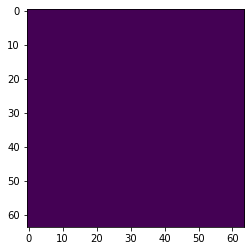

In [47]:
plt.imshow(image)